# 第9章：モンテかルロ・シミュレーション

## はじめに

In [1]:
%pip install -q japanize-matplotlib-jlite py4macro
import japanize_matplotlib_jlite
import numpy as np
import matplotlib.pyplot as plt
import py4macro
import random

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 14.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 38.0 MB/s eta 0:00:00


## 大数の法則

### 大数の法則とは

### コイントスの平均

コード9.2.1

In [2]:
random.randint(0,1)

1

コード9.2.2

In [3]:
n = 30
toss = [random.randint(0,1)
        for _ in range(n)]
head = sum(toss)
avr = head / n
avr

0.5666666666666667

### シミュレーション1:実現値の総入れ替え

コード9.2.3

In [4]:
def calculate_avr(n):
    toss = [random.randint(0,1)
            for _ in range(n)]
    head = sum(toss)
    avr = head / n
    return avr

コード9.2.4

In [5]:
random.seed(12)
for n in [5, 100, 1000]:
    print( calculate_avr(n) )

0.8
0.48
0.514


コード9.2.5

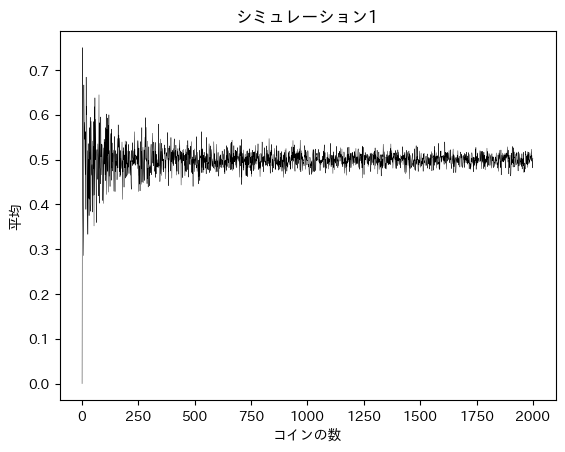

In [6]:
random.seed(123)
N = 2000
sample = range(1, N+1)
avr_lst1 = []

for n in sample:
    res = calculate_avr(n)
    avr_lst1.append(res)

plt.plot(sample, avr_lst1,
         linewidth=0.3,
         color="black")
plt.title("シミュレーション1",
          size=12)
plt.xlabel("コインの数", size=10)
plt.ylabel("平均", size=10)
plt.show()

コード9.2.6

In [7]:
def aad(lst):
    dev = [abs(v-0.5) for v in lst]
    res = sum(dev) / len(dev)
    return res

aad(avr_lst1)

0.016774426748154478

コード9.2.7

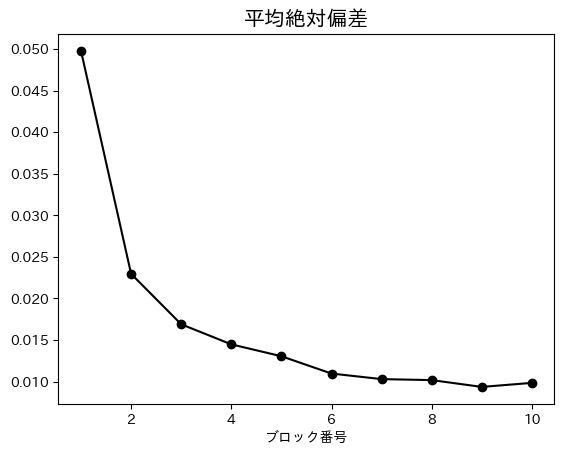

In [8]:
m = 200
M = int(N / m)
aad_lst = []

for i in range(0, N, m):
    lst = avr_lst1[i:i+m]
    res = aad(lst)
    aad_lst.append( res )

plt.plot(range(1,M+1), aad_lst,
         marker="o",
         color="black")
plt.xlabel("ブロック番号")
plt.title("平均絶対偏差", size=15)
plt.show()

### シミュレーション2:実現値の逐次的追加

コード9.2.8

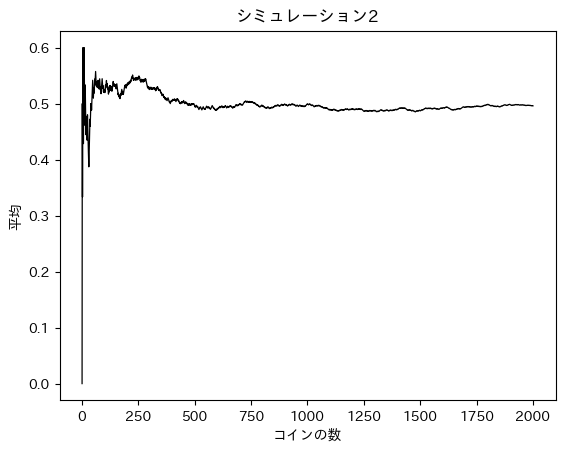

In [9]:
random.seed(123)

head_count = 0
avr_lst2 = []

for i in range(1, N+1):
    coin = random.randint(0, 1)
    head_count += coin
    avr = head_count / i
    avr_lst2.append(avr)

plt.plot(sample, avr_lst2,
          linewidth=0.9,
          color="black")
plt.title("シミュレーション2",
          size=12)
plt.xlabel("コインの数", size=10)
plt.ylabel("平均", size=10)
plt.show()

### 2つのシミュレーションの比較

## 中心極限定理

### 中心極限定理とは

### コイントス（再考）

コード9.3.1

In [10]:
n, head = 30, 12
( head/n - 0.5 ) / ( 0.5/n**0.5 )

-1.0954451150103321

コード9.3.2

In [11]:
def standardized_avr(n):
    """
    [引数] n：同時にトスするコインの数
    [戻り値] コインの表の平均を標準化した値"""

    toss = [random.randint(0,1) for _ in range(n)]
    head = sum(toss)
    st_avr = (head/n - 0.5) / ( 0.5/n**0.5 )

    return st_avr

コード9.3.3

In [12]:
random.seed(1)
n, N = 2, 5
toss = [standardized_avr(n) for _ in range(N)]
toss

[-1.4142135623730951,
 0.0,
 1.4142135623730951,
 1.4142135623730951,
 -1.4142135623730951]

### ヒストグラム

#### 準備

コード9.3.4

In [13]:
unique = len( set(toss) )
unique

3

コード9.3.5

In [14]:
set(toss)

{-1.4142135623730951, 0.0, 1.4142135623730951}

#### ヒストグラムのプロット

コード9.3.6

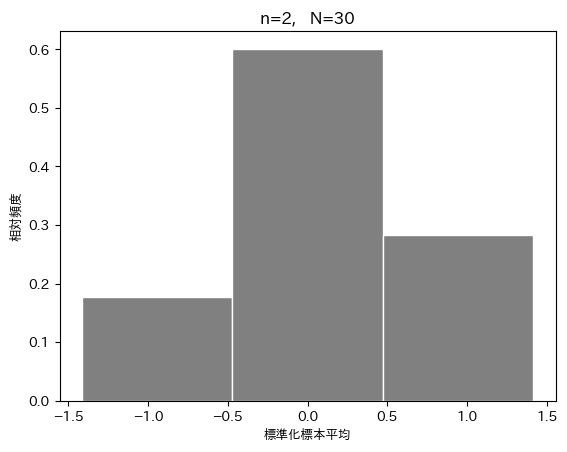

In [15]:
random.seed(123)
n, N = 2, 30
toss = [standardized_avr(n)
        for _ in range(N)]
unique = len( set(toss) )
plt.hist(toss, bins=unique,
          color="grey",
          edgecolor="white",
          density=True)
plt.title(f"n={n},   N={N}",
          size=12)
plt.xlabel("標準化標本平均",
            size=9)
plt.ylabel("相対頻度", size=9)
plt.show()

コード9.3.7

In [16]:
def plot_hist(n, N=10_000, seed=None):
    """
    [引数] n: 一度に投げるコインの数
            N: 試行回数"""
    random.seed(seed)
    toss = [standardized_avr(n) for _ in range(N)]
    unique = len( set(toss) )    # 階級の数
    plt.hist(toss, bins=unique, color="grey",
                    edgecolor="white", density=True)
    plt.title(f"n={n},   N={N}", size=12)
    plt.xlabel("標準化標本平均", size=9)
    plt.ylabel("相対頻度", size=9)
    plt.show()

#### シミュレーション

コード9.3.8

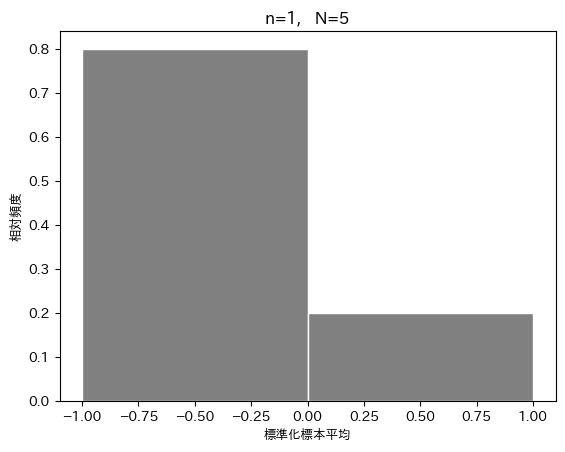

In [17]:
plot_hist(1, 5, seed=2)

コード9.3.9

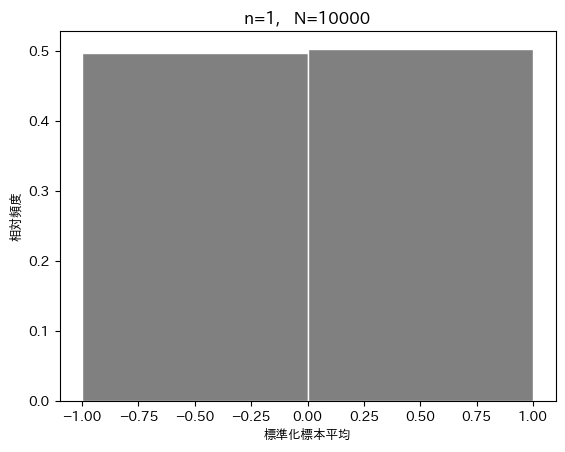

In [18]:
plot_hist(1, seed=2)

コード9.3.10

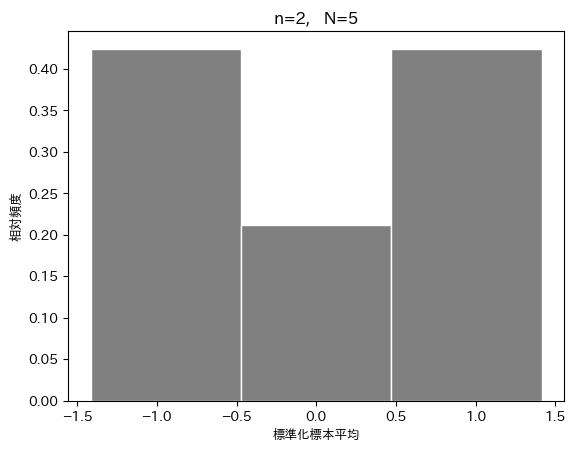

In [19]:
plot_hist(2, 5, seed=1)

コード9.3.11

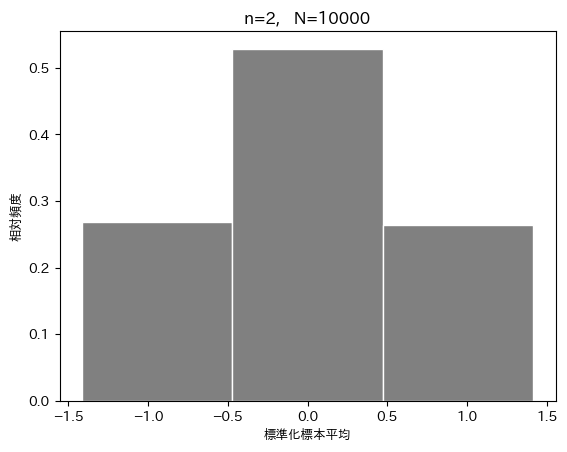

In [20]:
plot_hist(2, seed=1)

コード9.3.12

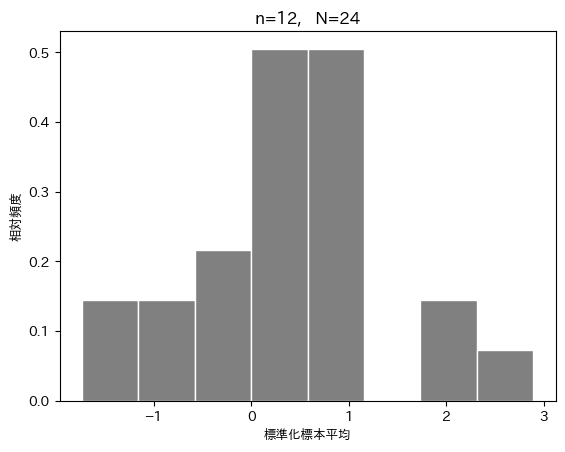

In [21]:
plot_hist(12, 24, seed=12)

コード9.3.13

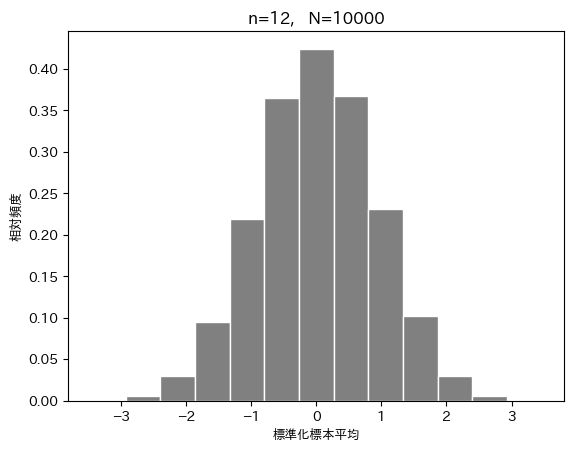

In [22]:
plot_hist(12, seed=12)

コード9.3.14

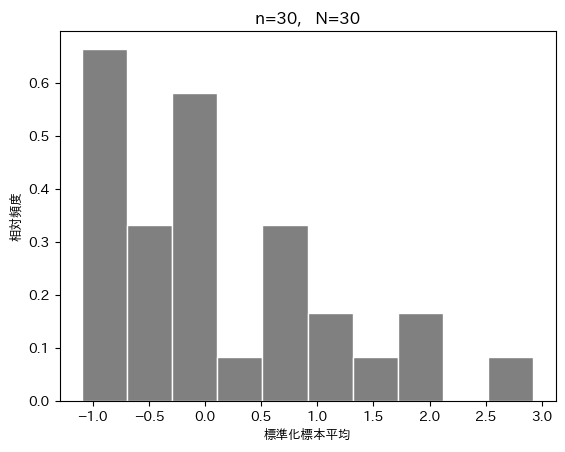

In [23]:
plot_hist(30, 30, seed=1)

コード9.3.15

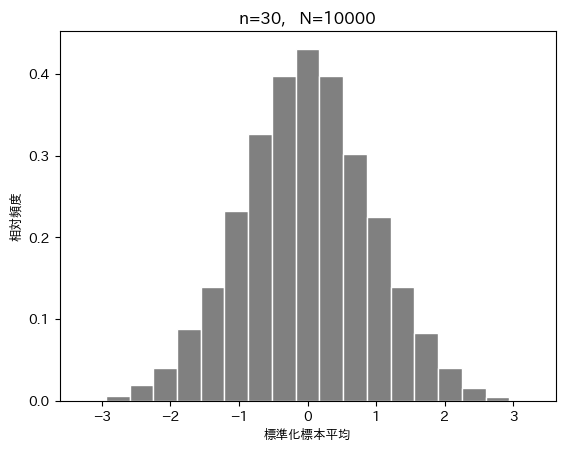

In [24]:
plot_hist(30, seed=1)

コード9.3.16

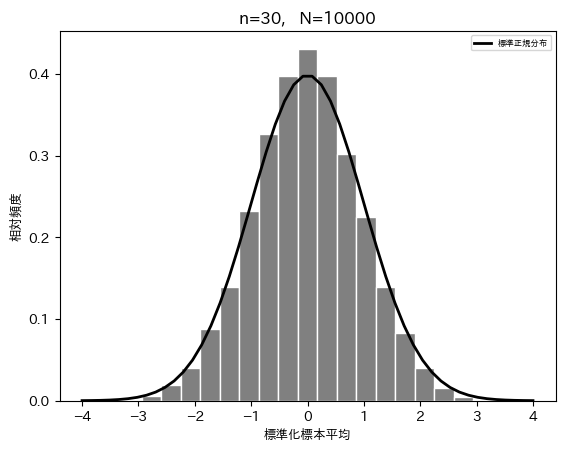

In [25]:
# 標準正規分布のコード
def normal_dist(z):
    return ( np.exp(-z**2/2) /
              (2*np.pi)**(0.5) )

x = py4macro.xvalues(-4, 4, 50)
y = [normal_dist(i) for i in x]

# 重ねてプロット
plt.plot(x, y,
         color="black",
         linewidth=2,
         label="標準正規分布")
plt.legend(fontsize=6)
plot_hist(30, seed=1)
plt.show()

コード9.3.17

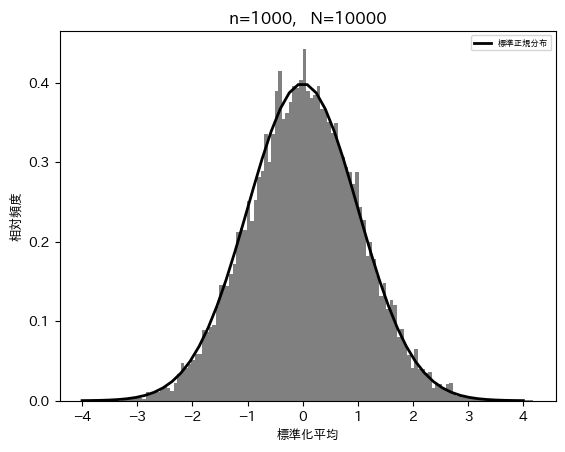

In [26]:
# コイントスのシミュレーション
random.seed(1)
n, N = 1000, 10_000
toss = [standardized_avr(n)
        for _ in range(N)]

# プロット
plt.hist(toss,
         bins=sorted(set(toss)),
         color="grey",
         density=True)
plt.title(f"n={n},   N={N}",
          size=12)
plt.xlabel("標準化平均", size=9)
plt.ylabel("相対頻度", size=9)
plt.plot(x, y,
          color="black",
          linewidth=2,
          label="標準正規分布")
plt.legend(fontsize=6)
plt.show()